# TLDR: Macro Avg. F1 = 51%

# Default Setup

In [ ]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 6.3MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

In [ ]:
df = pd.read_csv(path_root + data_root + "SemEval2017/SemEval2017-task4-dev.subtask-A.english.INPUT.txt", sep="\t", header=None)
df = df[[1,2]]
labels = df[1].to_list()
text = df[2].to_list()

X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

## Classify

Training on 'positive': 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]



              precision    recall  f1-score   support

    negative       0.32      0.76      0.45       630
     neutral       0.67      0.42      0.52      2105
    positive       0.59      0.56      0.57      1392

    accuracy                           0.52      4127
   macro avg       0.53      0.58      0.51      4127
weighted avg       0.59      0.52      0.53      4127


 Accuracy: 0.519



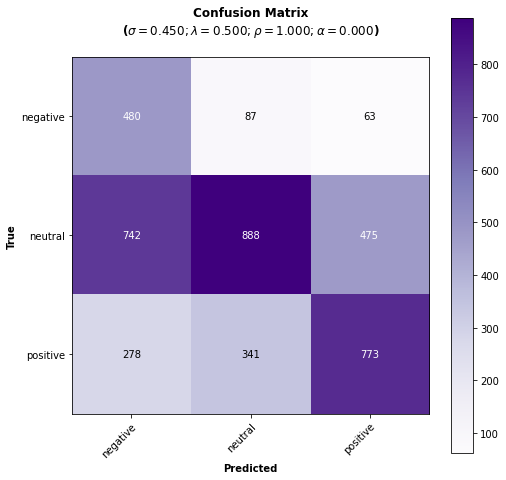

0.5139359194932306

In [ ]:
clf = SS3()
clf.fit(X_train, y_train, n_grams=5)
Evaluation.test(clf, X_val, y_val, metric="f1-score")